In [15]:
%matplotlib inline

# Bokeh for interactive, Seaborn for static

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid", palette="pastel")
# sns.set(style="whitegrid", palette=sns.color_palette("RdBu", n_colors=2))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from math import pi
import glob

In [45]:
num_obst = 40

if num_obst == 0:
    fsm_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/fsm-0-1_best.csv'
    bnn_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/bnn-0-1_best.csv'
#     tws_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/bnn_twist-0-1_best.csv'
else:
    fsm_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/fsm-40-2-best20.csv'
    bnn_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/bnn-40-2_best.csv'
#     tws_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/.csv'


df_fsm = pd.read_csv(fsm_fullfile, sep=' ')
df_bnn = pd.read_csv(bnn_fullfile, sep=' ')
# df_tws = pd.read_csv(tws_fullfile, sep=' ')

# df.describe()

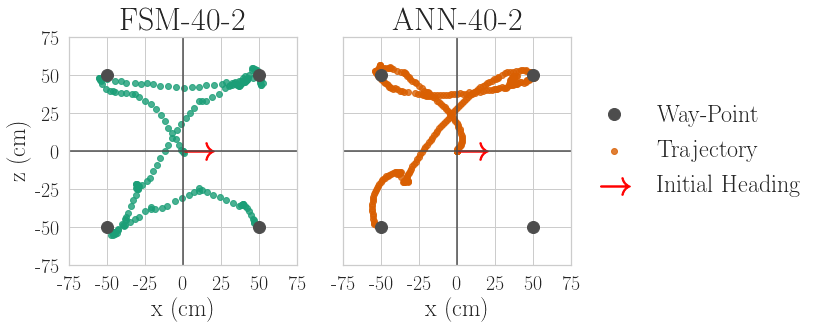

In [46]:
ticksize = 20
labelsize = 24
legendsize = labelsize
titlesize = 32

ncols = 2
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(ncols * 4.5, 4.5))
colors = sns.color_palette(['#1b9e77','#d95f02','#7570b3','#66c2a5','#fc8d62','#8da0cb'])

def plot_trajectory(df, title, ax, color, left_axis=False):
    
    ax_min, ax_max = -75, 75
    ax_padding = (ax_max - ax_min) * 0
    ax_lims_with_padding = [ax_min - ax_padding, ax_max + ax_padding]
    ax.set_ylim(ax_lims_with_padding)
    ax.set_xlim(ax_lims_with_padding)

    # Prettify the lines and ticks
    ax_ticks = np.linspace(ax_min, ax_max, num=7);
    ax.set_xticks(ax_ticks);
    ax.set_xticklabels([int(ax_val) for ax_val in ax_ticks], fontsize=ticksize);
    
    ax.set_yticks(ax_ticks);
    if left_axis:
        ax.set_yticklabels([int(ax_val) for ax_val in ax_ticks], fontsize=ticksize);
    else:
        ax.set_yticklabels([]);

    # Plot trajectory
    sns.regplot(x=df['x']*100, y=df['z']*100, fit_reg=False, ax=ax, color=color)

    # Draw initial orientation
    # ax.arrow(0, 0, 10, 0, head_width=7, head_length=7, fc='red', ec='red', label='Initial Heading')
    ax.scatter(10, 0, c='red', marker=r'$\rightarrow$', s=1000, label='arrow')

    # Add origin axes
    ax.plot([0, 0], ax_lims_with_padding, color='0.3', linestyle='-', linewidth=1.5, label='_nolegend_')
    ax.plot(ax_lims_with_padding, [0, 0], color='0.3', linestyle='-', linewidth=1.5, label='_nolegend_')

    # Add targets
    ax.plot( 50,  50, 'o', color='0.3', markersize=12)
    ax.plot(-50,  50, 'o', color='0.3', markersize=12, label='_nolegend_')
    ax.plot( 50, -50, 'o', color='0.3', markersize=12, label='_nolegend_')
    ax.plot(-50, -50, 'o', color='0.3', markersize=12, label='_nolegend_')
    
    ax.set_title(title, fontsize=titlesize)
    ax.set_xlabel('x (cm)', fontsize=labelsize)
    
    if left_axis:
        ax.set_ylabel('z (cm)', fontsize=labelsize)
    else:
        ax.set_ylabel('')
    
    ax.set_aspect('equal', 'box')


exp_id = '-0-1' if num_obst == 0 else '-40-2'
    
plot_trajectory(df_fsm, 'FSM' + exp_id, ax[0], colors[3] if num_obst == 0 else colors[0], True)
plot_trajectory(df_bnn, 'ANN' + exp_id, ax[1], colors[4] if num_obst == 0 else colors[1])


lgd = ax[1].legend(('Way-Point', 'Trajectory', 'Initial Heading')
                   , fontsize=legendsize
                   , loc='center right'
                   , bbox_to_anchor=(2.1, 0.5)
                   , frameon=False
                  )

# sns.despine(top=True, right=True, left=True, bottom=True)
# plt.tight_layout()

In [7]:
if num_obst == 0:
    fig.savefig('0-1-best_trajectories.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
else:
    fig.savefig('40-2-best_trajectories.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

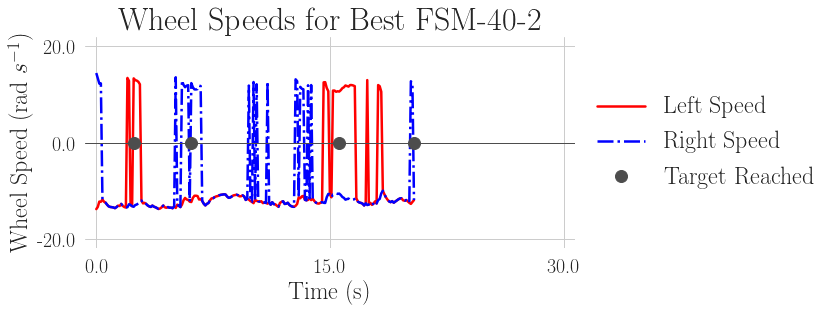

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9*1.3, 4.5))

exp_name = 'fsm'

title = 'Wheel Speeds for Best '
if exp_name == 'fsm':
    df = df_fsm
    title += 'FSM'
elif exp_name == 'bnn':
    df = df_bnn
    title += 'ANN'
else:
    df = df_tws
    title += 'ANN Twist'

title +=  '-0-1' if num_obst == 0 else '-40-2'
# title += ' (Without Obstacles)' if num_obst == 0 else ' (With Obstacles)'
max_time = 12 if num_obst == 0 else 30

final_time = df['time'].max()

# plt.plot(df['time'], df[['left_speed', 'right_speed']], linestyle=':', linewidth=4)# * -1)
plt.plot(df['time'], df['left_speed'], linestyle='-', linewidth=2.5, color='red')
plt.plot(df['time'], df['right_speed'], linestyle='-.', linewidth=2.5, color='blue')

# Prettify the lines and ticks
x_min, x_max = 0, max_time
x_padding = (x_max - x_min) * 0.025
x_lims_with_padding = [x_min - x_padding, x_max + x_padding]
ax.set_xlim(x_lims_with_padding)

x_ticks = np.linspace(x_min, x_max, num=3);
ax.set_xticks(x_ticks);
ax.set_xticklabels([round(x_val, 1) for x_val in x_ticks], fontsize=ticksize);

y_min, y_max = -20, 20
y_padding = (y_max - y_min) * 0.05
y_lims_with_padding = [y_min - y_padding, y_max + y_padding]
ax.set_ylim(y_lims_with_padding)

y_ticks = np.linspace(y_min, y_max, num=3);
ax.set_yticks(y_ticks);
ax.set_yticklabels([round(y_val, 2) for y_val in y_ticks], fontsize=ticksize);

target_times = df['target_idx'].diff()[df['target_idx'].diff() != 0].index.values
for t_idx in (list(target_times[1:]) + [df.shape[0] - 1]):
    t = df['time'][t_idx]
    ax.plot(t, 0, 'o', color='0.3', markersize=12)
#     ax.plot([t, t], y_lims_with_padding, color='0.3', linestyle='--', linewidth=1)

    
ax.plot(x_lims_with_padding, [0, 0], color='0.3', linestyle='-', linewidth=1)

ax.set_title(title, fontsize=titlesize)
ax.set_ylabel('Wheel Speed (rad $s^{-1}$)', fontsize=labelsize)
ax.set_xlabel('Time (s)', fontsize=labelsize)
lgd = ax.legend(('Left Speed', 'Right Speed', 'Target Reached'), 
                fontsize=legendsize, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()

In [14]:
figfilename = 'ANN' if exp_name == 'bnn' else 'FSM'
figfilename += '-0-1' if num_obst == 0 else '-40-2'
figfilename += '-best_speed.pdf'

fig.savefig(figfilename, bbox_extra_artists=(lgd,), bbox_inches='tight')

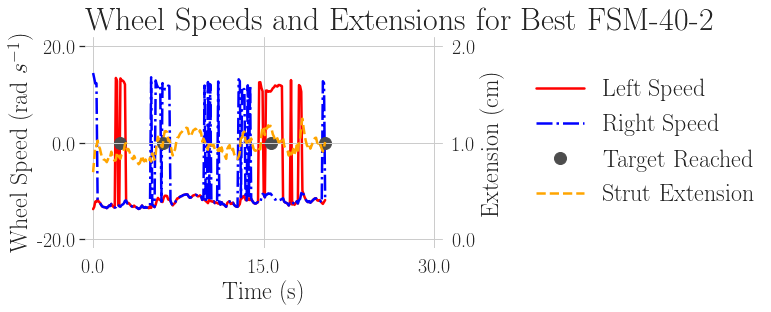

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9*1.3, 4.5))

exp_name = 'fsm'

title = 'Wheel Speeds and Extensions for Best '
if exp_name == 'fsm':
    df = df_fsm
    title += 'FSM'
elif exp_name == 'bnn':
    df = df_bnn
    title += 'ANN'
else:
    df = df_tws
    title += 'ANN Twist'

title +=  '-0-1' if num_obst == 0 else '-40-2'
# title += ' (Without Obstacles)' if num_obst == 0 else ' (With Obstacles)'
max_time = 12 if num_obst == 0 else 30

final_time = df['time'].max()

# lines = ax.plot(df['time'], df[['left_speed', 'right_speed']])
lines = ax.plot(df['time'], df['left_speed'], linestyle='-', linewidth=2.5, color='red')
lines += ax.plot(df['time'], df['right_speed'], linestyle='-.', linewidth=2.5, color='blue')

# Prettify the lines and ticks
x_min, x_max = 0, max_time
x_padding = (x_max - x_min) * 0.025
x_lims_with_padding = [x_min - x_padding, x_max + x_padding]
ax.set_xlim(x_lims_with_padding)

x_ticks = np.linspace(x_min, x_max, num=3);
ax.set_xticks(x_ticks);
ax.set_xticklabels([round(x_val, 1) for x_val in x_ticks], fontsize=ticksize);

y_min, y_max = -20, 20
y_padding = (y_max - y_min) * 0.05
y_lims_with_padding = [y_min - y_padding, y_max + y_padding]
ax.set_ylim(y_lims_with_padding)

y_ticks = np.linspace(y_min, y_max, num=3);
ax.set_yticks(y_ticks);
ax.set_yticklabels([round(y_val, 2) for y_val in y_ticks], fontsize=ticksize);

target_times = df['target_idx'].diff()[df['target_idx'].diff() != 0].index.values
for t_idx in (list(target_times[1:]) + [df.shape[0] - 1]):
    t = df['time'][t_idx]
    lines.append(ax.plot(t, 0, 'o', color='0.3', markersize=12)[0])
#     ax.plot([t, t], y_lims_with_padding, color='0.3', linestyle='--', linewidth=1)

    
ax.plot(x_lims_with_padding, [0, 0], color='0.3', linestyle='-', linewidth=1)

ax.set_title(title, fontsize=titlesize, loc='left')
ax.set_ylabel('Wheel Speed (rad $s^{-1}$)', fontsize=labelsize)
ax.set_xlabel('Time (s)', fontsize=labelsize)

ax2 = ax.twinx()
lines.append(ax2.plot(df['time'], df['weg_extension'], linestyle='--', linewidth=2.5, color='orange')[0])
ax2.set_ylabel('Extension (cm)', fontsize=labelsize)

y_min, y_max = 0, 0.02
y_padding = (y_max - y_min) * 0.05
y_lims_with_padding = [y_min - y_padding, y_max + y_padding]
ax2.set_ylim(y_lims_with_padding)

y_ticks = np.linspace(y_min, y_max, num=3);
ax2.set_yticks(y_ticks);
ax2.set_yticklabels([round(y_val, 2)*100 for y_val in y_ticks], fontsize=ticksize);
ax2.yaxis.set_label_position('right')

lines = lines[:3] + [lines[-1]]
lgd = ax.legend(lines, ('Left Speed', 'Right Speed', 'Target Reached', 'Strut Extension'), 
                fontsize=legendsize, loc='center left', bbox_to_anchor=(1.2, 0.5), frameon=False)


# sns.despine(top=True, right=True, left=True, bottom=True)
sns.despine(ax=ax,  top=True, right=True,  left=True, bottom=True)
sns.despine(ax=ax2, top=True, right=False, left=True, bottom=True)
ax2.spines['right'].set_color('white')
plt.tight_layout()

In [51]:
figfile = 'ANN' if exp_name == 'bnn' else 'FSM'
figfile += '-0-1' if num_obst == 0 else '-40-2'
figfile += '-best_speed-strut.pdf'
fig.savefig(figfile, bbox_extra_artists=(lgd,), bbox_inches='tight')

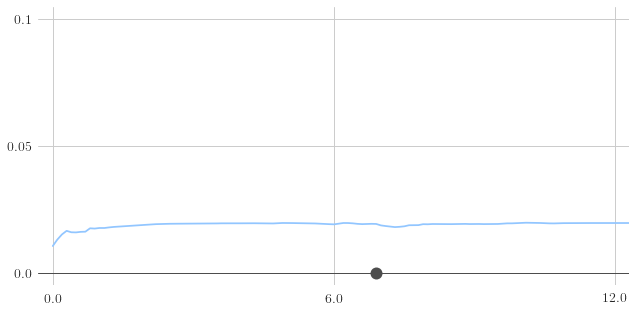

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,4.5))

final_time = df['time'].max()

plt.plot(df['time'], df['weg_extension'])

# Prettify the lines and ticks
x_min, x_max = 0, 12
x_padding = (x_max - x_min) * 0.025
x_lims_with_padding = [x_min - x_padding, x_max + x_padding]
ax.set_xlim(x_lims_with_padding)

x_ticks = np.linspace(x_min, x_max, num=3);
ax.set_xticks(x_ticks);
ax.set_xticklabels([round(x_val, 1) for x_val in x_ticks], fontsize=14);

y_min, y_max = 0, .1
y_padding = (y_max - y_min) * 0.05
y_lims_with_padding = [y_min - y_padding, y_max + y_padding]
ax.set_ylim(y_lims_with_padding)

y_ticks = np.linspace(y_min, y_max, num=3);
ax.set_yticks(y_ticks);
ax.set_yticklabels([round(y_val, 2) for y_val in y_ticks], fontsize=14);

target_times = df['target_idx'].diff()[df['target_idx'].diff() != 0].index.values
for t_idx in (list(target_times[1:]) + [df.shape[0] - 1]):
    t = df['time'][t_idx]
    ax.plot(t, 0, 'o', color='0.3', markersize=12)
#     ax.plot([t, t], y_lims_with_padding, color='0.3', linestyle='--', linewidth=1)

    
ax.plot(x_lims_with_padding, [0, 0], color='0.3', linestyle='-', linewidth=1)

# ax.set_title('Wheel Speeds for the Best Evolved ANN', fontsize=24)
# ax.set_ylabel('Wheel Speed (rad $s^{-1}$)', fontsize=18)
# ax.set_xlabel('Time (s)', fontsize=18)
# ax.legend(('Left Speed', 'Right Speed', 'Target Reached'), fontsize=18, loc='center left', bbox_to_anchor=(1, 0.5))

sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()

In [4]:
df_fsm.describe()

,time,angle_scaled,angular_speed_error_scaled,linear_speed_error_scaled,left_speed,right_speed,weg_extension,target_idx,x,y,z
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,10.201927,0.520214,0.166361,0.288047,-8.798518,-8.700024,0.009667,1.824390,0.011677,0.057341,0.080603
std,5.930523,0.125051,0.102475,0.110413,8.594079,8.699259,0.001069,0.927991,0.353097,0.013053,0.394513
min,0.005000,0.125000,0.000000,0.020444,-13.828000,-13.794200,0.006924,0.000000,-0.554917,0.028961,-0.548878
25%,5.105000,0.456511,0.085065,0.197831,-12.832700,-12.832700,0.008854,1.000000,-0.307459,0.045825,-0.320160
50%,10.200000,0.512230,0.149280,0.272356,-12.211200,-12.174000,0.009613,2.000000,-0.001322,0.055066,0.253608
75%,15.300000,0.601252,0.242606,0.355850,-11.183400,-11.110900,0.010445,2.000000,0.395614,0.067866,0.453831
max,20.400000,0.941901,0.449310,0.587065,13.430300,14.455200,0.012488,3.000000,0.522523,0.089537,0.549332


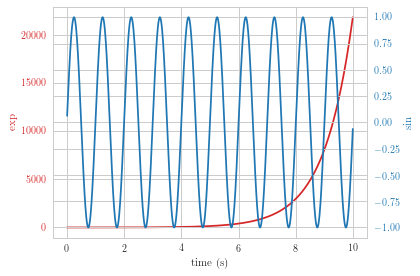

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [57]:
lines